In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solvers_gallery
import equations_gallery

%matplotlib inline

---

``solvers_galery`` containts default solvers

In [2]:
lFAS = solvers_gallery.get_FAS('linear')

``eqations_galery`` containts default equations

In [3]:
q22 = equations_gallery.get_quasilinear(2, 2)

In [4]:
solution = lFAS.solve(q22, J=5)

Tolerance is 0.00098
Iteration 0
          Defect 1 = 6.4e+04, Defect 2 = 2.1e+05
Iteration 1
          Defect 1 = 3.8e+02, Defect 2 = 7e+02
Iteration 2
          Defect 1 = 9.5, Defect 2 = 1.6e+01
Iteration 3
          Defect 1 = 0.31, Defect 2 = 0.45
Iteration 4
          Defect 1 = 0.011, Defect 2 = 0.015
Iteration 5
          Defect 1 = 0.00036, Defect 2 = 0.00053


The exact solution is known so it is possible to compute an error

In [5]:
q22.errors(solution)

array([  4.59439458e-06,   1.08833775e-04])

---

Nonlinear FAS solver

In [6]:
FAS = solvers_gallery.get_FAS('nonlinear')

Harmonic equation. Linearization is performed by taking contravariant metric coefficients from the previous step.

In [7]:
harmonic = equations_gallery.get_harmonic('Frozen Metric')

Boundary conditions should be specified in the special format

In [8]:
def triangle_bc(current):
    u, v = current
    N, M = u.shape
    z = np.linspace(0, 1, N)
    ###
    u[:, 0] = z
    u[:, -1] = 0.5*z
    u[0, :] = 0
    u[-1, :] = 1 - 0.5*z
    ###
    v[:, -1] = 1 - 0.5*z
    v[:, 0] = 0
    v[0, :] = z
    v[-1, :] = 0.5*z
    ###
    return np.array([u, v])

In [9]:
harmonic.bc = triangle_bc

In [10]:
solution = FAS.solve(harmonic, J=4)

Tolerance is 0.0039
Iteration 0
          Defect 1 = 0.5, Defect 2 = 0.5
Iteration 1
          Defect 1 = 0.044, Defect 2 = 0.044
Iteration 2
          Defect 1 = 0.002, Defect 2 = 0.002


Visualization of generated mesh.

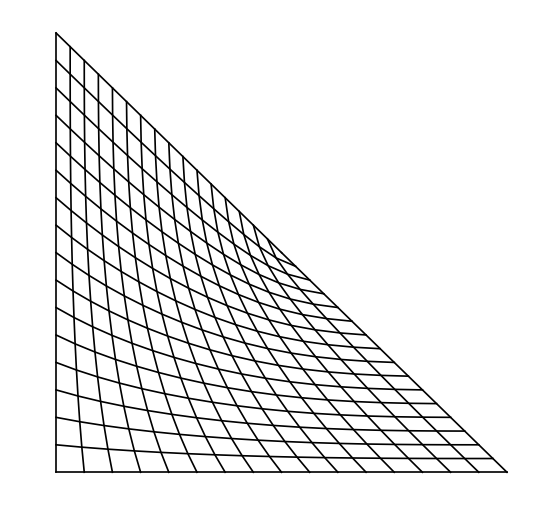

In [11]:
plt.figure(num=None, figsize=(8, 8), dpi=80)
plt.plot(solution[0], solution[1], color='black')
plt.plot(solution[0].T, solution[1].T, color='black')
dummy = plt.axis('off')